In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
import math
import numpy as np
from itertools import product
from collections import Counter
import garpar as gp
import re

In [2]:
mer = joblib.load("./until_2025-05-17.pklj")
mer= mer[6000:6252]
mer = mer.drop(columns=['BRIO', 'BRIO6','EDLH','EMDE','ESME','INAG','IRCP','PGR'])
mer = mer.ffill()
mer = mer.infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True)
mer

/tmp/ipykernel_16241/3343783768.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mer = mer.ffill()


,ALUA,BBAR,BMA,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,...,MORI,MTR,OEST,PATA,POLL,RICH,RIGO,SAMI,SEMI,TGLT
2024-05-07,870.0,4001.0,6900.05,1689.0,1205.0,115.25,1127.0,4890.0,1104.55,3902.5,...,178.0,1520.0,1064.0,969.0,460.0,933.0,918.5,822.0,102.25,30.70
2024-05-08,858.5,3850.0,6922.50,1660.0,1172.8,118.30,1101.0,4842.5,1081.00,3846.0,...,173.5,1460.0,1040.0,961.5,460.0,920.0,918.5,800.0,100.00,29.50
2024-05-09,848.0,3774.0,6880.00,1618.0,1162.0,121.50,1076.0,4799.0,1097.00,3760.0,...,166.0,1399.0,1015.0,956.5,460.0,913.0,880.0,799.5,96.90,28.25
2024-05-10,918.5,3721.0,6814.00,339.5,1120.0,119.95,1058.0,4785.0,1087.00,3738.0,...,175.0,1403.0,1048.0,1000.0,450.0,893.5,915.0,825.0,99.70,29.40
2024-05-13,885.0,3650.0,6605.00,325.0,1080.0,132.00,1025.9,4719.0,1027.00,3712.0,...,166.0,1417.0,1044.5,998.0,450.0,867.0,915.0,800.0,99.50,29.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12,620.0,8290.0,10700.00,390.0,1430.0,143.50,1345.0,6490.0,1965.00,7290.0,...,272.0,2390.0,778.0,1450.0,305.0,1445.0,800.0,646.0,27.55,21.10
2025-05-13,659.0,8480.0,10775.00,392.5,1470.0,159.75,1355.0,6550.0,2075.00,7300.0,...,265.0,2360.0,802.0,1440.0,305.0,1405.0,800.0,662.0,27.00,21.35
2025-05-14,680.0,8510.0,10850.00,408.0,1520.0,174.00,1340.0,6600.0,2085.00,7220.0,...,270.0,2415.0,807.0,1480.0,300.0,1430.0,810.0,699.0,27.20,22.00
2025-05-15,683.0,8300.0,10775.00,406.0,1540.0,174.75,1345.0,6760.0,2080.00,7190.0,...,269.5,2485.0,815.0,1465.0,300.0,1500.0,790.0,667.0,27.25,22.70


In [3]:
# mervalf = gp.datasets.load_MERVAL(    first="07-29-2021", last = "07-29-2022")
base12 = gp.StocksSet.from_prices(
        mer,
        weights=None,
        title="2025Merval12m",
        description=("Argentine stock market prices") )
base9 = gp.StocksSet.from_prices(
        mer[69:252],
        weights=None,
        title="2025Merval9m",
        description=("Argentine stock market prices") )
base6 = gp.StocksSet.from_prices(
        mer[132:252],
        weights=None,
        title="2025Merval6m",
        description=("Argentine stock market prices") )
base3 = gp.StocksSet.from_prices(
        mer[194:252],
        weights=None,
        title="2025Merval3m",
        description=("Argentine stock market prices") )


In [4]:
ms = gp.optimize.mean_variance.MVOptimizer( model='max_sharpe')
sharpe12 = ms.optimize(base12)
sharpe9 = ms.optimize(base9)
sharpe6 = ms.optimize(base6)
sharpe3 = ms.optimize(base3)

/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")


In [5]:
wsharpe12 = sharpe12.weights_prune().weights.to_frame()
wsharpe12.rename(columns={'Weights': 'Weights Sharpe 12'}, inplace=True)
wsharpe9 = sharpe9.weights_prune().weights.to_frame()
wsharpe9.rename(columns={'Weights': 'Weights Sharpe 9'}, inplace=True)
wsharpe6 = sharpe6.weights_prune().weights.to_frame()
wsharpe6.rename(columns={'Weights': 'Weights Sharpe 6'}, inplace=True)
wsharpe3 = sharpe3.weights_prune().weights_prune().weights.to_frame()
wsharpe3.rename(columns={'Weights': 'Weights Sharpe 3'}, inplace=True)

In [6]:
wsharpe = pd.concat([wsharpe12, wsharpe9, wsharpe6, wsharpe3], axis=1)
wsharpe = wsharpe.fillna(0)
wsharpe

,Weights Sharpe 12,Weights Sharpe 9,Weights Sharpe 6,Weights Sharpe 3
Stocks,,,,
MIRG,0.036487,0.000000,0.000000,0.000000
SUPV,0.175968,0.000000,0.000000,0.000000
DYCA,0.227445,0.344111,0.000000,0.000000
GARO,0.180358,0.094999,0.800629,0.000000
GRIM,0.121744,0.000000,0.092562,0.278334
METR,0.203482,0.304549,0.000000,0.000000
RICH,0.054516,0.025454,0.000000,0.000000
BBAR,0.000000,0.009888,0.000000,0.000000
GCLA,0.000000,0.220998,0.106809,0.079955


In [7]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.01)
marko12_mean= mk.optimize(base12)
marko9_mean= mk.optimize(base9)
marko6_mean= mk.optimize(base6)
marko3_mean= mk.optimize(base3)


/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [8]:
wmarko12_mean = marko12_mean.weights_prune().weights.to_frame()
wmarko12_mean.rename(columns={'Weights': 'Weights Mark(r) 12'}, inplace=True)
wmarko9_mean = marko9_mean.weights_prune().weights.to_frame()
wmarko9_mean.rename(columns={'Weights': 'Weights Mark(r) 9'}, inplace=True)
wmarko6_mean = marko6_mean.weights_prune().weights.to_frame()
wmarko6_mean.rename(columns={'Weights': 'Weights Mark(r) 6'}, inplace=True)
wmarko3_mean = marko3_mean.weights_prune().weights.to_frame()
wmarko3_mean.rename(columns={'Weights': 'Weights Mark(r) 3'}, inplace=True)

In [9]:
wmarko_mean = pd.concat([wmarko12_mean, wmarko9_mean, wmarko6_mean, wmarko3_mean], axis=1)
wmarko_mean = wmarko_mean.fillna(0)
wmarko_mean

,Weights Mark(r) 12,Weights Mark(r) 9,Weights Mark(r) 6,Weights Mark(r) 3
Stocks,,,,
MIRG,0.070236,0.124641,0.098579,0.042601
VALO,0.071843,0.042582,0.000000,0.000000
CADO,0.163119,0.170733,0.217814,0.000000
DYCA,0.007496,0.004075,0.013776,0.000000
GAMI,0.105089,0.106749,0.094511,0.000000
GARO,0.036172,0.025531,0.040801,0.000000
GCLA,0.057047,0.035986,0.038738,0.056742
GRIM,0.074287,0.080969,0.067890,0.097908
INTR,0.036635,0.023179,0.016213,0.006933


In [10]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.005)
marko12_mean2= mk.optimize(base12)
marko9_mean2= mk.optimize(base9)
marko6_mean2= mk.optimize(base6)
marko3_mean2= mk.optimize(base3)

/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [11]:
wmarko12_mean2 = marko12_mean2.weights_prune().weights.to_frame()
wmarko12_mean2.rename(columns={'Weights': 'Weights Mark(r) 12'}, inplace=True)
wmarko9_mean2 = marko9_mean2.weights_prune().weights.to_frame()
wmarko9_mean2.rename(columns={'Weights': 'Weights Mark(r) 9'}, inplace=True)
wmarko6_mean2 = marko6_mean2.weights_prune().weights.to_frame()
wmarko6_mean2.rename(columns={'Weights': 'Weights Mark(r) 6'}, inplace=True)
wmarko3_mean2 = marko3_mean2.weights_prune().weights.to_frame()
wmarko3_mean2.rename(columns={'Weights': 'Weights Mark(r) 3'}, inplace=True)

In [12]:
wmarko_mean2 = pd.concat([wmarko12_mean2, wmarko9_mean2, wmarko6_mean2, wmarko3_mean2], axis=1)
wmarko_mean2 = wmarko_mean2.fillna(0)
wmarko_mean2

,Weights Mark(r) 12,Weights Mark(r) 9,Weights Mark(r) 6,Weights Mark(r) 3
Stocks,,,,
MIRG,0.070236,0.123865,0.098653,0.043817
VALO,0.071843,0.043039,0.000000,0.000000
CADO,0.163119,0.172000,0.218211,0.000000
DYCA,0.007496,0.003228,0.013804,0.000000
GAMI,0.105089,0.107658,0.094873,0.000034
GARO,0.036172,0.025036,0.039852,0.000000
GCLA,0.057047,0.035263,0.038418,0.055865
GRIM,0.074287,0.080767,0.067566,0.095753
INTR,0.036635,0.023615,0.016518,0.008924


In [13]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.003)
marko12_mean3= mk.optimize(base12)
marko9_mean3= mk.optimize(base9)
marko6_mean3= mk.optimize(base6)
marko3_mean3= mk.optimize(base3)

/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [14]:
wmarko12_mean3 = marko12_mean3.weights_prune().weights.to_frame()
wmarko12_mean3.rename(columns={'Weights': 'Weights Mark(r) 12'}, inplace=True)
wmarko9_mean3 = marko9_mean3.weights_prune().weights.to_frame()
wmarko9_mean3.rename(columns={'Weights': 'Weights Mark(r) 9'}, inplace=True)
wmarko6_mean3 = marko6_mean3.weights_prune().weights.to_frame()
wmarko6_mean3.rename(columns={'Weights': 'Weights Mark(r) 6'}, inplace=True)
wmarko3_mean3 = marko3_mean3.weights_prune().weights.to_frame()
wmarko3_mean3.rename(columns={'Weights': 'Weights Mark(r) 3'}, inplace=True)

In [15]:
wmarko_mean3 = pd.concat([wmarko12_mean3, wmarko9_mean3, wmarko6_mean3, wmarko3_mean3], axis=1)
wmarko_mean3 = wmarko_mean3.fillna(0)
wmarko_mean3


,Weights Mark(r) 12,Weights Mark(r) 9,Weights Mark(r) 6,Weights Mark(r) 3
Stocks,,,,
MIRG,0.070236,0.123555,0.098683,0.043724
VALO,0.071843,0.043222,0.000000,0.000000
CADO,0.163119,0.172507,0.218370,0.000000
DYCA,0.007496,0.002889,0.013815,0.000000
GAMI,0.105089,0.108022,0.095018,0.001940
GARO,0.036172,0.024838,0.039472,0.000000
GCLA,0.057047,0.034973,0.038290,0.055664
GRIM,0.074287,0.080687,0.067436,0.095178
INTR,0.036635,0.023789,0.016640,0.009039


In [16]:
resultados = {}  # acá se guardarán todos los dataframes

# valores de target_return desde 0.004 hasta 0.103 (100 valores)
retornos = [0.002 * i for i in range(4, 103)]

for i, tr in enumerate(retornos, start=4):

    mk = gp.optimize.mean_variance.Markowitz(target_return=tr)

    # optimización para cada horizonte temporal
    marko12 = mk.optimize(base12)
    marko9  = mk.optimize(base9)
    marko6  = mk.optimize(base6)
    marko3  = mk.optimize(base3)

    # convertir a DataFrame igual que en tu ejecución manual
    w12 = marko12.weights_prune().weights.to_frame()
    w12.rename(columns={'Weights': f'Weights Mark(r) 12'}, inplace=True)

    w9  = marko9.weights_prune().weights.to_frame()
    w9.rename(columns={'Weights': f'Weights Mark(r) 9'}, inplace=True)

    w6  = marko6.weights_prune().weights.to_frame()
    w6.rename(columns={'Weights': f'Weights Mark(r) 6'}, inplace=True)

    w3  = marko3.weights_prune().weights.to_frame()
    w3.rename(columns={'Weights': f'Weights Mark(r) 3'}, inplace=True)

    # concatenar como hacías vos
    df = pd.concat([w12, w9, w6, w3], axis=1).fillna(0)

    # guardar con el nombre solicitado
    resultados[f"wmarko_mean{i}"] = df

# ejemplo: ver wmarko_mean4
resultados;



/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The c

In [17]:
wmarko_mean4 = resultados["wmarko_mean4"]
wmarko_mean53 = resultados["wmarko_mean53"]
wmarko_mean4  = resultados["wmarko_mean4"]
wmarko_mean5  = resultados["wmarko_mean5"]
wmarko_mean6  = resultados["wmarko_mean6"]
wmarko_mean7  = resultados["wmarko_mean7"]
wmarko_mean8  = resultados["wmarko_mean8"]
wmarko_mean9  = resultados["wmarko_mean9"]
wmarko_mean10 = resultados["wmarko_mean10"]
wmarko_mean11 = resultados["wmarko_mean11"]
wmarko_mean12 = resultados["wmarko_mean12"]
wmarko_mean13 = resultados["wmarko_mean13"]
wmarko_mean14 = resultados["wmarko_mean14"]
wmarko_mean15 = resultados["wmarko_mean15"]
wmarko_mean16 = resultados["wmarko_mean16"]
wmarko_mean17 = resultados["wmarko_mean17"]
wmarko_mean18 = resultados["wmarko_mean18"]
wmarko_mean19 = resultados["wmarko_mean19"]
wmarko_mean20 = resultados["wmarko_mean20"]
wmarko_mean21 = resultados["wmarko_mean21"]
wmarko_mean22 = resultados["wmarko_mean22"]
wmarko_mean23 = resultados["wmarko_mean23"]
wmarko_mean24 = resultados["wmarko_mean24"]
wmarko_mean25 = resultados["wmarko_mean25"]
wmarko_mean26 = resultados["wmarko_mean26"]
wmarko_mean27 = resultados["wmarko_mean27"]
wmarko_mean28 = resultados["wmarko_mean28"]
wmarko_mean29 = resultados["wmarko_mean29"]
wmarko_mean30 = resultados["wmarko_mean30"]
wmarko_mean31 = resultados["wmarko_mean31"]
wmarko_mean32 = resultados["wmarko_mean32"]
wmarko_mean33 = resultados["wmarko_mean33"]
wmarko_mean34 = resultados["wmarko_mean34"]
wmarko_mean35 = resultados["wmarko_mean35"]
wmarko_mean36 = resultados["wmarko_mean36"]
wmarko_mean37 = resultados["wmarko_mean37"]
wmarko_mean38 = resultados["wmarko_mean38"]
wmarko_mean39 = resultados["wmarko_mean39"]
wmarko_mean40 = resultados["wmarko_mean40"]
wmarko_mean41 = resultados["wmarko_mean41"]
wmarko_mean42 = resultados["wmarko_mean42"]
wmarko_mean43 = resultados["wmarko_mean43"]
wmarko_mean44 = resultados["wmarko_mean44"]
wmarko_mean45 = resultados["wmarko_mean45"]
wmarko_mean46 = resultados["wmarko_mean46"]
wmarko_mean47 = resultados["wmarko_mean47"]
wmarko_mean48 = resultados["wmarko_mean48"]
wmarko_mean49 = resultados["wmarko_mean49"]
wmarko_mean50 = resultados["wmarko_mean50"]
wmarko_mean51 = resultados["wmarko_mean51"]
wmarko_mean52 = resultados["wmarko_mean52"]
wmarko_mean53 = resultados["wmarko_mean53"]
wmarko_mean55 = resultados["wmarko_mean55"]
wmarko_mean56 = resultados["wmarko_mean56"]
wmarko_mean57 = resultados["wmarko_mean57"]
wmarko_mean58 = resultados["wmarko_mean58"]
wmarko_mean59 = resultados["wmarko_mean59"]
wmarko_mean60 = resultados["wmarko_mean60"]
wmarko_mean61 = resultados["wmarko_mean61"]
wmarko_mean62 = resultados["wmarko_mean62"]
wmarko_mean63 = resultados["wmarko_mean63"]
wmarko_mean64 = resultados["wmarko_mean64"]
wmarko_mean65 = resultados["wmarko_mean65"]
wmarko_mean66 = resultados["wmarko_mean66"]
wmarko_mean67 = resultados["wmarko_mean67"]
wmarko_mean68 = resultados["wmarko_mean68"]
wmarko_mean69 = resultados["wmarko_mean69"]
wmarko_mean70 = resultados["wmarko_mean70"]
wmarko_mean71 = resultados["wmarko_mean71"]
wmarko_mean72 = resultados["wmarko_mean72"]
wmarko_mean73 = resultados["wmarko_mean73"]
wmarko_mean74 = resultados["wmarko_mean74"]
wmarko_mean75 = resultados["wmarko_mean75"]
wmarko_mean76 = resultados["wmarko_mean76"]
wmarko_mean77 = resultados["wmarko_mean77"]
wmarko_mean78 = resultados["wmarko_mean78"]
wmarko_mean79 = resultados["wmarko_mean79"]
wmarko_mean80 = resultados["wmarko_mean80"]
wmarko_mean81 = resultados["wmarko_mean81"]
wmarko_mean82 = resultados["wmarko_mean82"]
wmarko_mean83 = resultados["wmarko_mean83"]
wmarko_mean84 = resultados["wmarko_mean84"]
wmarko_mean85 = resultados["wmarko_mean85"]
wmarko_mean86 = resultados["wmarko_mean86"]
wmarko_mean87 = resultados["wmarko_mean87"]
wmarko_mean88 = resultados["wmarko_mean88"]
wmarko_mean89 = resultados["wmarko_mean89"]
wmarko_mean90 = resultados["wmarko_mean90"]
wmarko_mean91 = resultados["wmarko_mean91"]
wmarko_mean92 = resultados["wmarko_mean92"]
wmarko_mean93 = resultados["wmarko_mean93"]
wmarko_mean94 = resultados["wmarko_mean94"]
wmarko_mean95 = resultados["wmarko_mean95"]
wmarko_mean96 = resultados["wmarko_mean96"]
wmarko_mean97 = resultados["wmarko_mean97"]
wmarko_mean98 = resultados["wmarko_mean98"]
wmarko_mean99 = resultados["wmarko_mean99"]
wmarko_mean100 = resultados["wmarko_mean100"]



In [18]:
dfs_por_corrida = {}

for nombre, df in resultados.items():
    # aseguramos orden consistente de columnas
    df_ordenado = df[
        ["Weights Mark(r) 12", "Weights Mark(r) 9",
         "Weights Mark(r) 6", "Weights Mark(r) 3"]
    ].copy()
    
    # guardar dataframe con el mismo nombre
    dfs_por_corrida[nombre] = df_ordenado

In [19]:
mk = gp.optimize.mean_variance.Markowitz(target_risk=0.30)
marko12_risk= mk.optimize(base12)
marko9_risk= mk.optimize(base9)
marko6_risk= mk.optimize(base6)
marko3_risk= mk.optimize(base3)


/home/nadia/carteras/lib/python3.10/site-packages/pypfopt/risk_models.py:70: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [20]:
wmarko12_risk = marko12_risk.weights_prune().weights.to_frame()
wmarko12_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 12'}, inplace=True)
wmarko9_risk = marko9_risk.weights_prune().weights.to_frame()
wmarko9_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 9'}, inplace=True)
wmarko6_risk = marko6_risk.weights_prune().weights.to_frame()
wmarko6_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 6'}, inplace=True)
wmarko3_risk = marko3_risk.weights_prune().weights.to_frame()
wmarko3_risk.rename(columns={'Weights': 'Weights Mark(riesgo) 3'}, inplace=True)


In [21]:
wmarko_risk = pd.concat([wmarko12_risk, wmarko9_risk, wmarko6_risk, wmarko3_risk], axis=1)
wmarko_risk = wmarko_risk.fillna(0).round(6)
wmarko_risk


,Weights Mark(riesgo) 12,Weights Mark(riesgo) 9,Weights Mark(riesgo) 6,Weights Mark(riesgo) 3
Stocks,,,,
BBAR,0.000000,0.000000,0.000000,0.000000
MIRG,0.229219,0.150156,0.062977,0.000000
SUPV,0.062900,0.000000,0.000000,0.000000
DYCA,0.161669,0.181090,0.019444,0.000000
GARO,0.144483,0.093303,0.286988,0.000000
GCLA,0.000000,0.184138,0.112653,0.081073
GRIM,0.167537,0.078548,0.132957,0.292246
METR,0.104526,0.115388,0.000000,0.000000
MTR,0.052113,0.028143,0.000000,0.167635


In [22]:
# === Bases igual que antes ===
rmeanbase12 = base12.as_returns().mean().to_frame()
rvariance12 = base12.as_returns().std().to_frame() * base12.as_returns().std().to_frame()
mvbase12 = pd.concat([rmeanbase12, rvariance12], axis=1)

rmeanbase9 = base9.as_returns().mean().to_frame()
rvariance9 = base9.as_returns().std().to_frame() * base9.as_returns().std().to_frame()
mvbase9 = pd.concat([rmeanbase9, rvariance9], axis=1)

rmeanbase6 = base6.as_returns().mean().to_frame()
rvariance6 = base6.as_returns().std().to_frame() * base6.as_returns().std().to_frame()
mvbase6 = pd.concat([rmeanbase6, rvariance6], axis=1)

rmeanbase3 = base3.as_returns().mean().to_frame()
rvariance3 = base3.as_returns().std().to_frame() * base3.as_returns().std().to_frame()
mvbase3 = pd.concat([rmeanbase3, rvariance3], axis=1)

In [23]:
# === Diccionario de dataframes de pesos ===
df_pesos_dict = {
    "wmarko_risk": wmarko_risk,
    "wsharpe": wsharpe,
    "wmarko_mean": wmarko_mean,
    "wmarko_mean3": wmarko_mean3,
    "wmarko_mean2": wmarko_mean2

}

# Agregar automáticamente wmarko_mean4 ... wmarko_mean53
for i in range(4, 54):
    nombre = f"wmarko_mean{i}"
    df_pesos_dict[nombre] = globals()[nombre]


In [24]:

    
# === Diccionario de dataframes base ===
bases_dict = {
    "12": mvbase12,
    "9": mvbase9,
    "6": mvbase6,
    "3": mvbase3
}

resultados = []

for nombre_pesos, df_pesos in df_pesos_dict.items():

    for col_peso in df_pesos.columns:

        # === Extraer el número (12, 9, 6, 3) desde el nombre de la columna ===
        match = re.search(r"(\d+)", col_peso)
        if not match:
            continue  # si no hay número, se saltea

        numero = match.group(1)

        # === Seleccionar la base que corresponde al número ===
        if numero not in bases_dict:
            continue  # si el número no coincide con bases disponibles

        base_df = bases_dict[numero]
        pesos = df_pesos[col_peso]

        # === Calcular media y varianza ===
        media = (pesos * base_df.iloc[:, 0]).sum()
        varianza = (pesos**2 * base_df.iloc[:, 1]).sum()

        resultados.append([
            nombre_pesos,   # df de pesos
            col_peso,       # columna de pesos
            f"mvbase{numero}",# base emparejada
            media,
            varianza
        ])

df_resultados = pd.DataFrame(
    resultados,
    columns=["DF_Pesos", "Col_Pesos", "DF_Base", "Media", "Varianza"]
)

df_resultados


,DF_Pesos,Col_Pesos,DF_Base,Media,Varianza
0,wmarko_risk,Weights Mark(riesgo) 12,mvbase12,0.003136,0.000188
1,wmarko_risk,Weights Mark(riesgo) 9,mvbase9,0.003370,0.000200
2,wmarko_risk,Weights Mark(riesgo) 6,mvbase6,0.002246,0.000292
3,wmarko_risk,Weights Mark(riesgo) 3,mvbase3,0.001774,0.000271
4,wsharpe,Weights Sharpe 12,mvbase12,0.003717,0.000324
...,...,...,...,...,...
215,wmarko_mean52,Weights Mark(r) 3,mvbase3,0.000520,0.000109
216,wmarko_mean53,Weights Mark(r) 12,mvbase12,0.000464,0.000061
217,wmarko_mean53,Weights Mark(r) 9,mvbase9,0.000348,0.000062
218,wmarko_mean53,Weights Mark(r) 6,mvbase6,-0.000303,0.000080


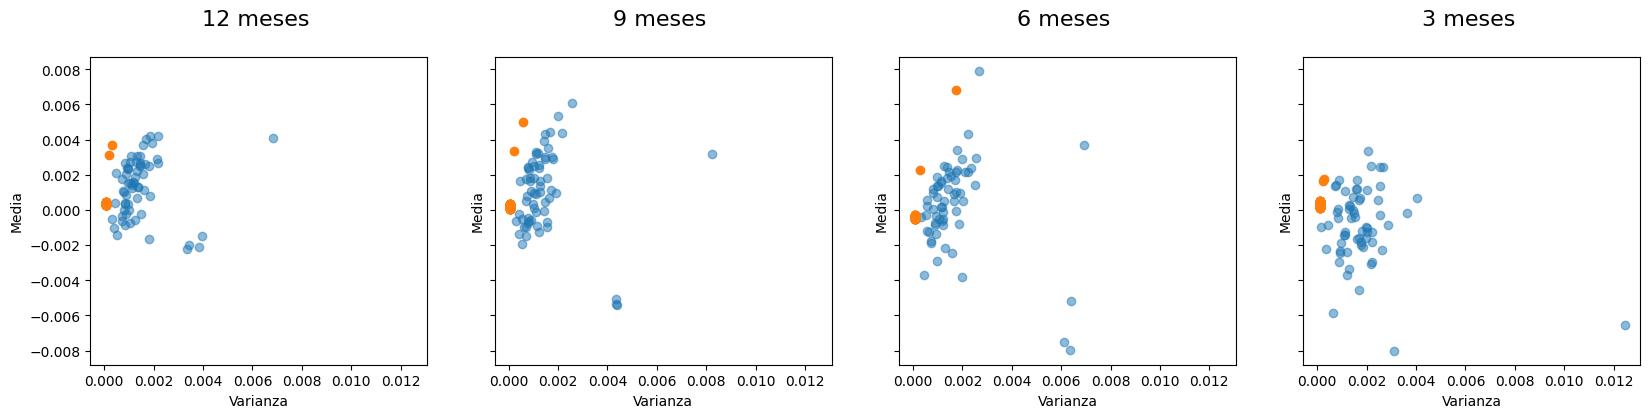

In [25]:
# Diagramas de dispersion con envolvente carteras


fig, ax = plt.subplots(1, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 4)
#12 meses
y12 = np.array(base12.as_returns().mean().to_frame())
x12 = np.array(base12.as_returns().std().to_frame()*base12.as_returns().std().to_frame())
ax[0].scatter(x12, y12,  alpha = 0.5)
ax[0].set_title(f"12 meses \n ", fontsize=16)
ax[0].set_xlabel("Varianza")
ax[0].set_ylabel("Media")
yc12 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase12')]["Media"]
xc12 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase12')]["Varianza"]
ax[0].scatter(xc12, yc12)

#9 meses
y9 = np.array(base9.as_returns().mean().to_frame())
x9 = np.array(base9.as_returns().std().to_frame()*base9.as_returns().std().to_frame())
ax[1].scatter(x9, y9,  alpha = 0.5)
ax[1].set_title(f"9 meses \n ", fontsize=16)
ax[1].set_xlabel("Varianza")
ax[1].set_ylabel("Media")
yc9 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase9')]["Media"]
xc9 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase9')]["Varianza"]
ax[1].scatter(xc9, yc9)


#6 meses
y6 = np.array(base6.as_returns().mean().to_frame())
x6 = np.array(base6.as_returns().std().to_frame()*base6.as_returns().std().to_frame())
ax[2].scatter(x6, y6,  alpha = 0.5)
ax[2].set_title(f"6 meses \n ", fontsize=16)
ax[2].set_xlabel("Varianza")
ax[2].set_ylabel("Media")
yc6 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase6')]["Media"]
xc6 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase6')]["Varianza"]
ax[2].scatter(xc6, yc6)


#9 meses
y3 = np.array(base3.as_returns().mean().to_frame())
x3 = np.array(base3.as_returns().std().to_frame()*base3.as_returns().std().to_frame())
ax[3].scatter(x3, y3,  alpha = 0.5)
ax[3].set_title(f"3 meses \n ", fontsize=16)
ax[3].set_xlabel("Varianza")
ax[3].set_ylabel("Media")
yc3 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase3')]["Media"]
xc3 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase3')]["Varianza"]
ax[3].scatter(xc3, yc3)

# plt.show()

In [26]:
df_resultados[df_resultados["DF_Base"].str.contains('mvbase3')]["Media"]

3      0.001774
7      0.001659
11     0.000129
15     0.000099
19     0.000109
23     0.000121
27     0.000129
31     0.000137
35     0.000146
39     0.000154
43     0.000162
47     0.000170
51     0.000178
55     0.000187
59     0.000195
63     0.000203
67     0.000211
71     0.000220
75     0.000228
79     0.000236
83     0.000245
87     0.000253
91     0.000261
95     0.000270
99     0.000278
103    0.000286
107    0.000295
111    0.000303
115    0.000312
119    0.000320
123    0.000328
127    0.000337
131    0.000345
135    0.000353
139    0.000362
143    0.000370
147    0.000378
151    0.000387
155    0.000395
159    0.000403
163    0.000412
167    0.000420
171    0.000428
175    0.000437
179    0.000445
183    0.000453
187    0.000462
191    0.000470
195    0.000478
199    0.000487
203    0.000495
207    0.000503
211    0.000512
215    0.000520
219    0.000528
Name: Media, dtype: float64

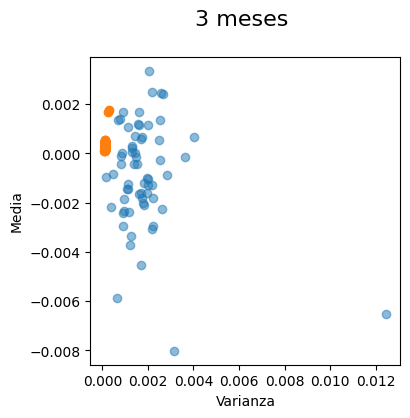

In [27]:
# Diagramas de dispersion con envolvente carteras


fig, ax = plt.subplots(1, 1, sharey=True, sharex=True)
fig.set_size_inches(4, 4)


#3 meses
y3 = np.array(base3.as_returns().mean().to_frame())
x3 = np.array(base3.as_returns().std().to_frame()*base3.as_returns().std().to_frame())
ax.scatter(x3, y3,  alpha = 0.5)
ax.set_title(f"3 meses \n ", fontsize=16)
ax.set_xlabel("Varianza")
ax.set_ylabel("Media")
yc3 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase3')]["Media"]
xc3 = df_resultados[df_resultados["DF_Base"].str.contains('mvbase3')]["Varianza"]
ax.scatter(xc3, yc3)

# plt.show()